In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\HP\Downloads\data_2_var.csv')

In [3]:
df.head()

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000


In [4]:
df = df.rename(columns={"-122.7406674" :'f1', "-130.5720846":'y'})

In [5]:
df

,f1,y
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000
...,...,...
1105,-115.366669,121.000000
1106,-119.954237,123.609122
1107,-109.942155,127.197394
1108,-111.515368,128.170885


In [6]:
df.describe()

,f1,y
count,1110.000000,1110.000000
mean,6.899714,-26.093318
std,79.324069,69.755980
min,-134.962839,-132.422167
25%,-53.366669,-76.994298
50%,15.739103,-46.036319
75%,76.193907,7.598960
max,134.605775,134.425495


<AxesSubplot:xlabel='f1', ylabel='y'>

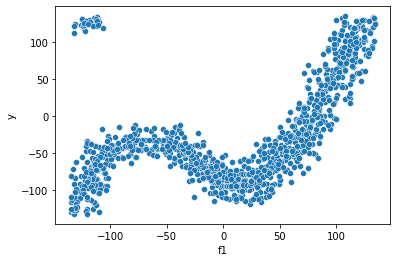

In [7]:
sns.scatterplot(data=df, x='f1', y='y')

In [8]:
outl_lst=df[(df["f1"]<(-100)) & (df["y"]>100)].index
outl_lst
df.drop(index=(outl_lst),inplace=True,axis=0)
df[(df["f1"]<(-100)) & (df["y"]>100)]

,f1,y


<AxesSubplot:xlabel='f1', ylabel='y'>

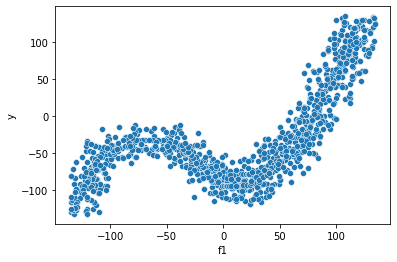

In [9]:
sns.scatterplot(data=df, x='f1', y='y')

<AxesSubplot:xlabel='f1'>

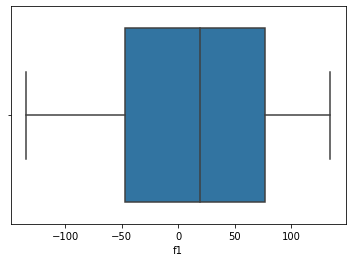

In [10]:
sns.boxplot(data=df, x='f1')

<AxesSubplot:xlabel='y'>

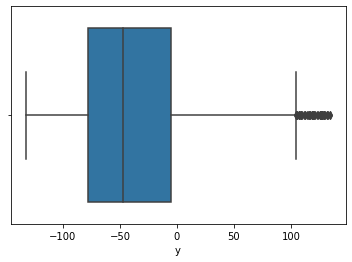

In [11]:
sns.boxplot(data=df, x='y')

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=5)
X_poly = poly_features.fit_transform(df[['f1']])
X_poly

array([[ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04,
        -1.79500520e+06,  2.18149530e+08, -2.65120220e+10],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04,
        -2.45584080e+06,  3.31334720e+08, -4.47026927e+10],
       [ 1.00000000e+00, -1.20605951e+02,  1.45457954e+04,
        -1.75430949e+06,  2.11580165e+08, -2.55178270e+10],
       ...,
       [ 1.00000000e+00,  1.15862302e+02,  1.34240731e+04,
         1.55534401e+06,  1.80205738e+08,  2.08790517e+10],
       [ 1.00000000e+00,  1.17366199e+02,  1.37748247e+04,
         1.61669883e+06,  1.89745797e+08,  2.22697430e+10],
       [ 1.00000000e+00,  9.96831410e+01,  9.93672860e+03,
         9.90524318e+05,  9.87385753e+07,  9.84257132e+09]])

In [13]:
transformed_df = pd.DataFrame(X_poly, columns=['f1_0', 'f1_1', 'f1_2','f1_3',"f1_4","f1_5"])

transformed_df['y'] = df['y']

transformed_df.head()

,f1_0,f1_1,f1_2,f1_3,f1_4,f1_5,y
0,1.0,-121.531419,14769.885901,-1.795005e+06,2.181495e+08,-2.651202e+10,-129.938929
1,1.0,-134.917019,18202.602016,-2.455841e+06,3.313347e+08,-4.470269e+10,-130.141832
2,1.0,-120.605951,14545.795441,-1.754309e+06,2.115802e+08,-2.551783e+10,-125.760932
3,1.0,-129.894781,16872.654053,-2.191670e+06,2.846865e+08,-3.697928e+10,-112.785214
4,1.0,-134.366669,18054.401658,-2.425910e+06,3.259614e+08,-4.379835e+10,-116.000000


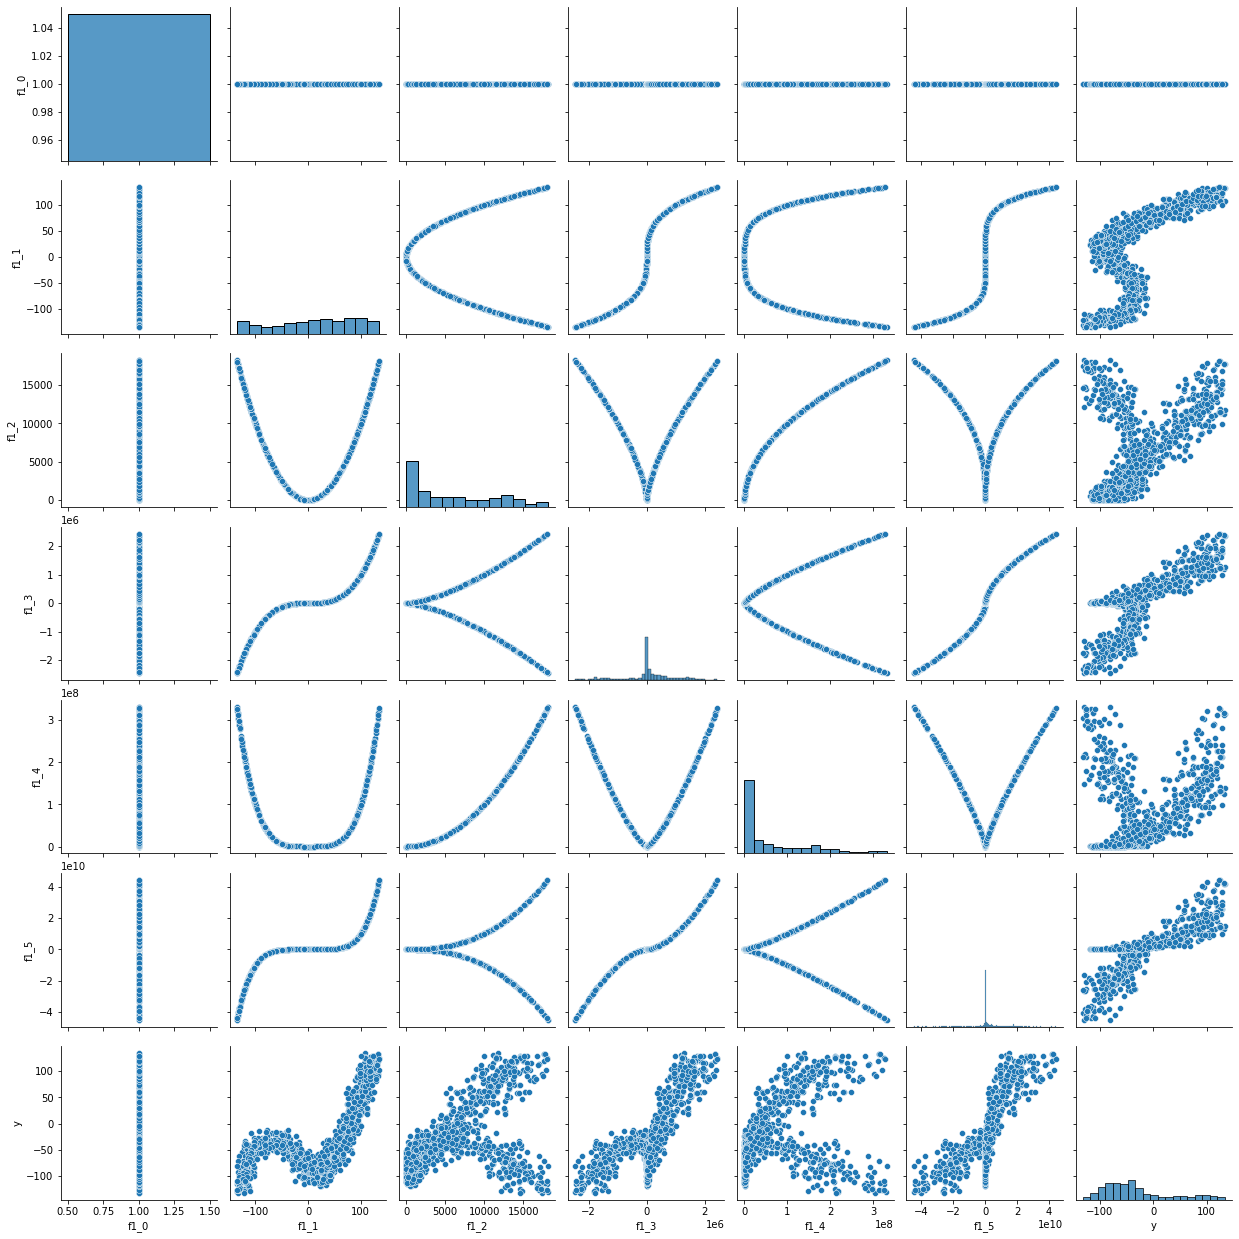

In [14]:
sns.pairplot(transformed_df)

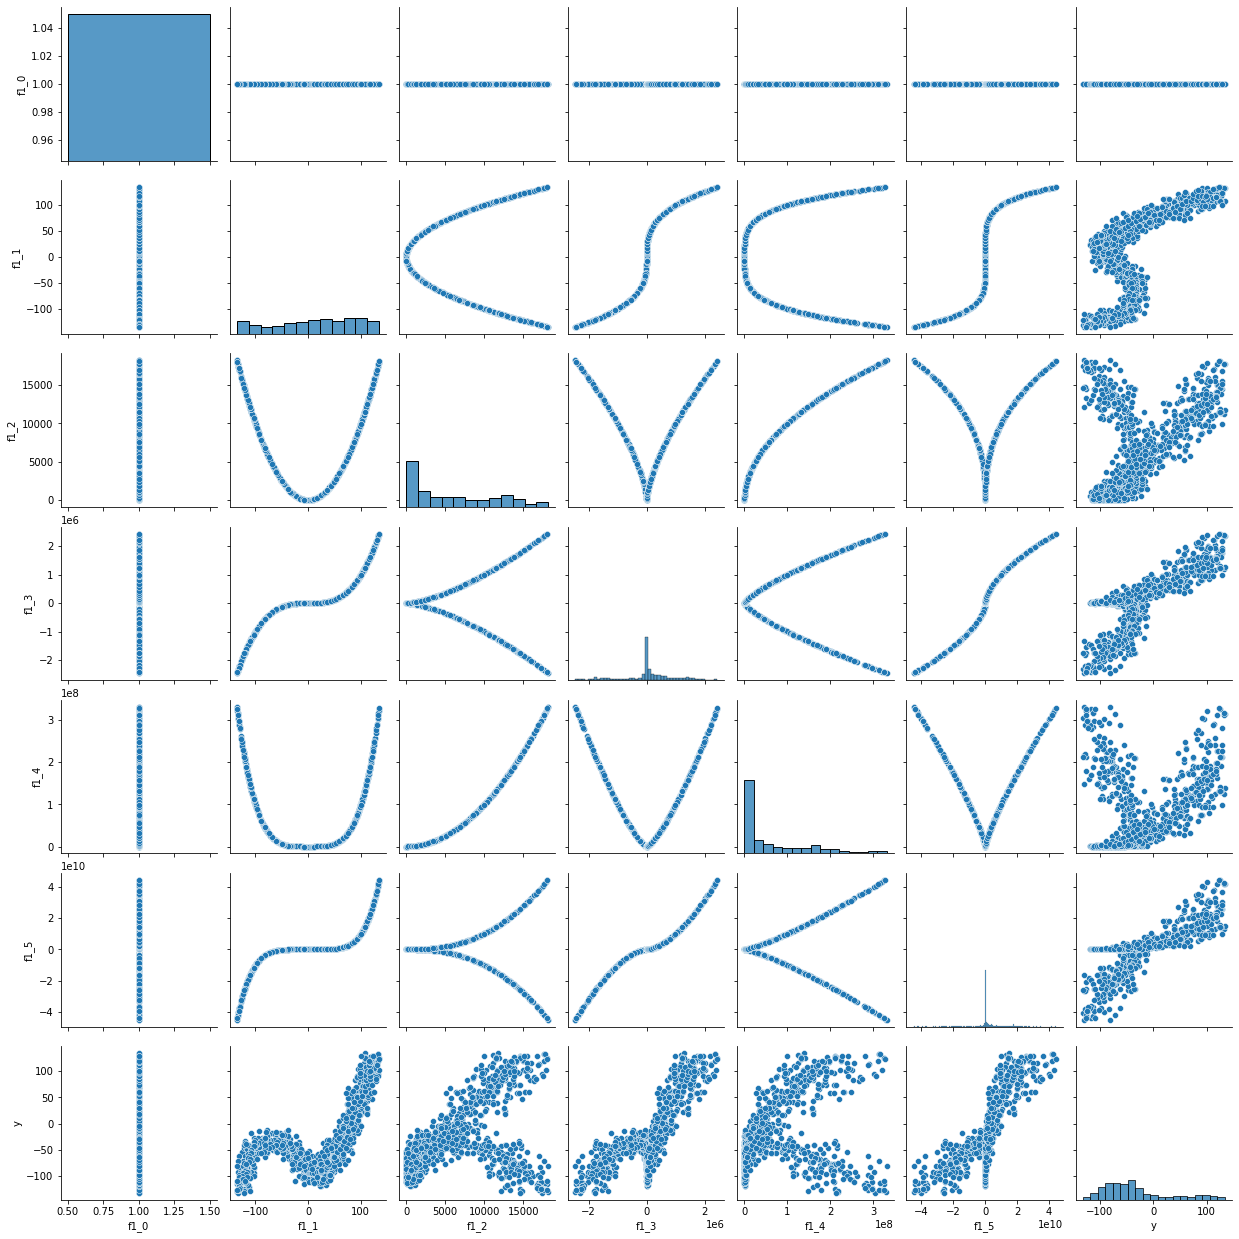

In [15]:
sns.pairplot(transformed_df)

In [16]:
X=transformed_df[['f1_0', 'f1_1', 'f1_2','f1_3',"f1_4","f1_5"]]
y=df['y']

# Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [18]:
pred = reg.predict(transformed_df[['f1_0', 'f1_1', 'f1_2','f1_3',"f1_4","f1_5"]])

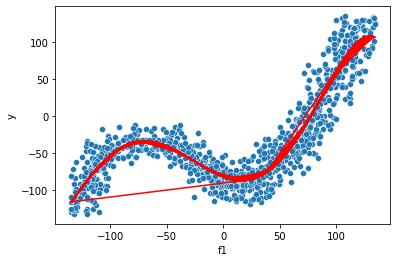

In [19]:
sns.scatterplot(data=df, x='f1', y="y")
plt.plot(df["f1"],pred,"r")


In [22]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y, pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y, pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y, pred)))

Mean Absolute Error:  16.04306858240253
Mean Squared Error:  459.3026952064242
Root Mean Squared Error:  21.431348422496054
